<a href="https://colab.research.google.com/github/venti-sei/Bet26/blob/main/bet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [1]:
# !pip install

# Import Libraries

In [2]:
import os, io, requests
import pandas as pd

In [3]:
# Import Dataset

In [4]:
seasons = {
  "2020-21": "2021",
  "2021-22": "2122",
  "2022-23": "2223",
  "2023-24": "2324",
  "2024-25": "2425",
}

base = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"
out_dir = "premier_league_2020_2025"
os.makedirs(out_dir, exist_ok=True)

frames = []
for label, code in seasons.items():
  url = base.format(code)
  try:
      r = requests.get(url, timeout=30)
      r.raise_for_status()
      df = pd.read_csv(io.BytesIO(r.content))
      df["Season"] = label
      frames.append(df)
      df.to_csv(os.path.join(out_dir, f"E0_{label}.csv"), index=False)
      print(f"✓ downloaded {label}")
  except requests.HTTPError as e:
      print(f"✗ {label} missing ({e}). Skipping.")

# combined file (only for seasons that downloaded)
if frames:
  all_df = pd.concat(frames, ignore_index=True)
  all_df.to_csv(os.path.join(out_dir, "E0_2020_2025_combined.csv"), index=False)
  print(f"Combined shape: {all_df.shape}")

✓ downloaded 2020-21
✓ downloaded 2021-22
✓ downloaded 2022-23
✓ downloaded 2023-24
✓ downloaded 2024-25
Combined shape: (1900, 133)


In [5]:
"""
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)
"""

'\nDate = Match Date (dd/mm/yy)\nTime = Time of match kick off\nHomeTeam = Home Team\nAwayTeam = Away Team\nFTHG and HG = Full Time Home Team Goals\nFTAG and AG = Full Time Away Team Goals\nFTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)\nHTHG = Half Time Home Team Goals\nHTAG = Half Time Away Team Goals\nHTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)\n\nMatch Statistics (where available)\nAttendance = Crowd Attendance\nReferee = Match Referee\nHS = Home Team Shots\nAS = Away Team Shots\nHST = Home Team Shots on Target\nAST = Away Team Shots on Target\nHHW = Home Team Hit Woodwork\nAHW = Away Team Hit Woodwork\nHC = Home Team Corners\nAC = Away Team Corners\nHF = Home Team Fouls Committed\nAF = Away Team Fouls Committed\nHFKC = Home Team Free Kicks Conceded\nAFKC = Away Team Free Kicks Conceded\nHO = Home Team Offsides\nAO = Away Team Offsides\nHY = Home Team Yellow Cards\nAY = Away Team Yellow Cards\nHR = Home Team Red Cards\nAR = Away Team Red Cards\nHBP = Ho

In [6]:
display(all_df.head(1))

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
relevant_columns = [ 'Date', 'Time', 'HomeTeam', 'AwayTeam',
                    'FTHG',	'FTAG',	'HTHG',	'HTAG',	'HTR',	'Referee',	'HS',	'AS',	'HST',	'AST',	'HF',	'AF',	'HC',	'AC',	'HY',	'AY',	'HR',	'AR' ,'FTR']

# Filter the DataFrame to keep only the relevant columns
filtered_df = all_df[relevant_columns]
display(filtered_df.head())

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,6,12,12,2,3,2,2,0,0,A
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,5,14,11,7,3,2,1,0,0,H
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,3,9,6,9,0,1,0,0,0,H
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,2,13,7,8,7,2,2,0,0,A
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,7,12,9,2,5,1,1,0,0,A


In [8]:
filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')
filtered_df = filtered_df.sort_values(by='MatchDateTime').reset_index(drop=True)
filtered_df['MatchOrder'] = filtered_df.index + 1

display(filtered_df.head())

/tmp/ipython-input-1528726994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5


In [9]:
filtered_df.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5
5,13/09/2020,16:30,Tottenham,Everton,0,1,0,0,D,M Atkinson,...,7,5,3,1,0,0,0,A,2020-09-13 16:30:00,6
6,14/09/2020,18:00,Sheffield United,Wolves,0,2,0,2,A,M Dean,...,7,12,5,2,1,0,0,A,2020-09-14 18:00:00,7
7,14/09/2020,20:15,Brighton,Chelsea,1,3,0,1,A,C Pawson,...,13,4,3,1,0,0,0,A,2020-09-14 20:15:00,8
8,19/09/2020,12:30,Everton,West Brom,5,2,2,1,H,M Dean,...,11,11,1,1,0,0,1,H,2020-09-19 12:30:00,9
9,19/09/2020,15:00,Leeds,Fulham,4,3,2,1,H,A Taylor,...,18,5,3,1,2,0,0,H,2020-09-19 15:00:00,10


In [10]:
filtered_df.tail(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
1890,25/05/2025,16:00,Nott'm Forest,Chelsea,0,1,0,0,D,A Taylor,...,11,7,4,2,2,0,0,A,2025-05-25 16:00:00,1891
1891,25/05/2025,16:00,Newcastle,Everton,0,1,0,0,D,T Harrington,...,9,12,3,1,4,0,0,A,2025-05-25 16:00:00,1892
1892,25/05/2025,16:00,Southampton,Arsenal,1,2,0,1,A,D Bond,...,8,5,8,0,0,0,0,A,2025-05-25 16:00:00,1893
1893,25/05/2025,16:00,Man United,Aston Villa,2,0,0,0,D,T Bramall,...,10,4,3,2,2,0,1,H,2025-05-25 16:00:00,1894
1894,25/05/2025,16:00,Tottenham,Brighton,1,4,1,0,H,R Jones,...,8,2,11,3,1,0,0,A,2025-05-25 16:00:00,1895
1895,25/05/2025,16:00,Ipswich,West Ham,1,3,0,1,A,T Robinson,...,9,4,0,1,1,0,0,A,2025-05-25 16:00:00,1896
1896,25/05/2025,16:00,Fulham,Man City,0,2,0,1,A,A Madley,...,5,1,6,0,0,0,0,A,2025-05-25 16:00:00,1897
1897,25/05/2025,16:00,Bournemouth,Leicester,2,0,0,0,D,L Smith,...,16,6,1,0,2,0,0,H,2025-05-25 16:00:00,1898
1898,25/05/2025,16:00,Liverpool,Crystal Palace,1,1,0,1,A,D England,...,10,11,0,1,0,1,0,D,2025-05-25 16:00:00,1899
1899,25/05/2025,16:00,Wolves,Brentford,1,1,0,1,A,C Pawson,...,9,8,3,2,1,0,0,D,2025-05-25 16:00:00,1900


In [11]:
filtered_df = filtered_df.drop(columns=['Date', 'Time', 'MatchDateTime'])
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HF,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,12,2,3,2,2,0,0,A,1
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,14,11,7,3,2,1,0,0,H,2
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,6,9,0,1,0,0,0,H,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,13,7,8,7,2,2,0,0,A,4
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,12,9,2,5,1,1,0,0,A,5


# Check Nonvalues

In [12]:
display(filtered_df.isnull().sum())

,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
HTR,0
Referee,0
HS,0
AS,0


# Task
Create two new columns, 'HP' and 'AP', in the `filtered_df` DataFrame. The 'HP' column should contain 3 if 'FTR' is 'H', 1 if 'FTR' is 'D', and 0 otherwise. The 'AP' column should contain 3 if 'FTR' is 'A', 1 if 'FTR' is 'D', and 0 otherwise. Finally, display the head of the modified `filtered_df` to verify the new columns.

## Add Home Points (HP) Column

### Subtask:
Create the 'HP' column in `filtered_df` where its value is 3 if 'FTR' is 'H', 1 if 'FTR' is 'D', and 0 otherwise.


**Reasoning**:
To create the 'HP' column based on conditional logic, I need to import the `numpy` library and use its `select` function, which is efficient for this type of operation.



In [13]:
import numpy as np

conditions = [
    filtered_df['FTR'] == 'H',
    filtered_df['FTR'] == 'D'
]

choices = [3, 1]

filtered_df['HP'] = np.select(conditions, choices, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,2,3,2,2,0,0,A,1,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,11,7,3,2,1,0,0,H,2,3
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,6,9,0,1,0,0,0,H,3,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,7,8,7,2,2,0,0,A,4,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,9,2,5,1,1,0,0,A,5,0


**Reasoning**:
The next step is to create the 'AP' column in `filtered_df` based on the 'FTR' column. I will use `np.select` to apply the conditional logic: 3 points for an 'A' (Away win), 1 for a 'D' (Draw), and 0 otherwise.



In [14]:
conditions_ap = [
    filtered_df['FTR'] == 'A',
    filtered_df['FTR'] == 'D'
]

choices_ap = [3, 1]

filtered_df['AP'] = np.select(conditions_ap, choices_ap, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


In [15]:
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


In [16]:
filtered_df = filtered_df.drop(columns=['FTR'])
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,2,3,2,2,0,0,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,11,7,3,2,1,0,0,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,6,9,0,1,0,0,0,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,7,8,7,2,2,0,0,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,9,2,5,1,1,0,0,5,0,3


# Feature Collection

## Add HRP and ARP

In [17]:
home_matches = filtered_df[['HomeTeam', 'AwayTeam', 'HP', 'MatchOrder']].copy()
home_matches.rename(columns={'HomeTeam': 'Team', 'AwayTeam': 'Opponent', 'HP': 'Points'}, inplace=True)

away_matches = filtered_df[['AwayTeam', 'HomeTeam', 'AP', 'MatchOrder']].copy()
away_matches.rename(columns={'AwayTeam': 'Team', 'HomeTeam': 'Opponent', 'AP': 'Points'}, inplace=True)

combined_match_data = pd.concat([home_matches, away_matches], ignore_index=True)
combined_match_data = combined_match_data.sort_values(by='MatchOrder').reset_index(drop=True)

display(combined_match_data.head())

,Team,Opponent,Points,MatchOrder
0,Fulham,Arsenal,0,1
1,Arsenal,Fulham,3,1
2,Crystal Palace,Southampton,3,2
3,Southampton,Crystal Palace,0,2
4,Liverpool,Leeds,3,3


In [18]:
combined_match_data['RollingPoints'] = combined_match_data.groupby('Team')['Points'].transform(lambda x: x.rolling(window=10, min_periods=1).sum().shift(1))
display(combined_match_data.head(20))

,Team,Opponent,Points,MatchOrder,RollingPoints
0,Fulham,Arsenal,0,1,NaN
1,Arsenal,Fulham,3,1,NaN
2,Crystal Palace,Southampton,3,2,NaN
3,Southampton,Crystal Palace,0,2,NaN
4,Liverpool,Leeds,3,3,NaN
5,Leeds,Liverpool,0,3,NaN
6,Newcastle,West Ham,3,4,NaN
7,West Ham,Newcastle,0,4,NaN
8,Leicester,West Brom,3,5,NaN
9,West Brom,Leicester,0,5,NaN


In [19]:
home_rolling_points = combined_match_data[combined_match_data['Team'] == combined_match_data['Opponent']].drop(columns=['Opponent'])
filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['HomeTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'HRP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['AwayTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'ARP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

display(filtered_df.tail(10))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AC,HY,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,3,2,2,0,0,1,0,3,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,3,2,1,0,0,2,3,0,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,1,0,0,0,3,3,0,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,7,2,2,0,0,4,0,3,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,5,1,1,0,0,5,0,3,NaN,NaN


## Last 5 Home and Away Points

# Task
Calculate 'HL5HP' by creating a temporary DataFrame for home matches, grouping by 'HomeTeam', calculating the rolling sum of 'HP' over the last 5 matches (shifted by 1), and then merging the result into `filtered_df`. Similarly, calculate 'AL5AP' by creating a temporary DataFrame for away matches, grouping by 'AwayTeam', calculating the rolling sum of 'AP' over the last 5 matches (shifted by 1), and then merging the result into `filtered_df`.

## Calculate Home Team Last 5 Home Points

### Subtask:
Create a temporary DataFrame with only home matches, calculate the rolling sum of 'HP' for each HomeTeam over the last 5 matches (shifted by 1), and then merge this back into 'filtered_df' as 'HL5HP'.


**Reasoning**:
First, I'll create a temporary DataFrame containing only the relevant columns for home matches, then calculate the rolling sum of 'HP' for each 'HomeTeam' over the last 5 matches, shifting by one to avoid data leakage. Finally, I will merge this new feature back into the original `filtered_df`.



In [20]:
home_matches_temp = filtered_df[['HomeTeam', 'MatchOrder', 'HP']].copy()
home_matches_temp['HL5HP'] = home_matches_temp.groupby('HomeTeam')['HP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, home_matches_temp[['HomeTeam', 'MatchOrder', 'HL5HP']], on=['HomeTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HY,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP,HL5HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,2,0,0,1,0,3,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,2,1,0,0,2,3,0,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,1,0,0,0,3,3,0,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,2,2,0,0,4,0,3,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,1,1,0,0,5,0,3,NaN,NaN,NaN


**Reasoning**:
Now that 'HL5HP' is calculated, I will calculate 'AL5AP' by creating a temporary DataFrame for away matches, computing the rolling sum of 'AP' over the last 5 matches (shifted by 1), and then merging this new feature into `filtered_df`.



In [21]:
away_matches_temp = filtered_df[['AwayTeam', 'MatchOrder', 'AP']].copy()
away_matches_temp['AL5AP'] = away_matches_temp.groupby('AwayTeam')['AP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, away_matches_temp[['AwayTeam', 'MatchOrder', 'AL5AP']], on=['AwayTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,0,0,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,1,0,0,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,0,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,2,0,0,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,1,0,0,5,0,3,NaN,NaN,NaN,NaN


In [24]:
pd.set_option('display.max_rows', None)
display(filtered_df.head(100))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,5,0,3,NaN,NaN,NaN,NaN
5,Tottenham,Everton,0,1,0,0,D,M Atkinson,9,15,5,4,15,7,5,3,1,0,0,0,6,0,3,NaN,NaN,NaN,NaN
6,Sheffield United,Wolves,0,2,0,2,A,M Dean,9,11,2,4,13,7,12,5,2,1,0,0,7,0,3,NaN,NaN,NaN,NaN
7,Brighton,Chelsea,1,3,0,1,A,C Pawson,13,10,3,5,8,13,4,3,1,0,0,0,8,0,3,NaN,NaN,NaN,NaN
8,Everton,West Brom,5,2,2,1,H,M Dean,17,6,7,4,9,11,11,1,1,0,0,1,9,3,0,3.0,0.0,NaN,NaN
9,Leeds,Fulham,4,3,2,1,H,A Taylor,10,14,7,6,13,18,5,3,1,2,0,0,10,3,0,0.0,0.0,NaN,NaN


## Correlation Heatmap

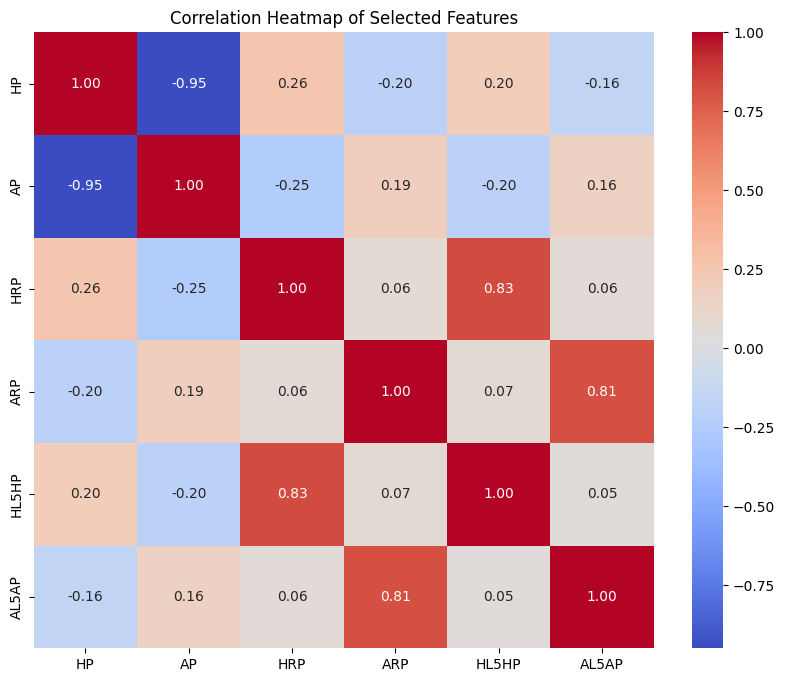

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation heatmap
correlation_features = ['HP', 'AP', 'HRP', 'ARP', 'HL5HP', 'AL5AP']

# Calculate the correlation matrix
correlation_matrix = filtered_df[correlation_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Two last head to head matches

# Task
For each match in `filtered_df`, determine the points obtained by the `HomeTeam` and `AwayTeam` in their last two head-to-head matches played against each other, storing them as `H2H_Home_Pts_1`, `H2H_Home_Pts_2`, `H2H_Away_Pts_1`, and `H2H_Away_Pts_2`. Subsequently, create a new column `H2H_Home_Sum_Last2Pts` by summing `H2H_Home_Pts_1` and `H2H_Home_Pts_2`, and another new column `H2H_Away_Sum_Last2Pts` by summing `H2H_Away_Pts_1` and `H2H_Away_Pts_2`.

## Calculate H2H Home Team Last 2 Matches Points Sum

### Subtask:
For each match, determine the points obtained by the HomeTeam in their last two head-to-head matches against the AwayTeam, store them in `H2H_Home_Pts_1` and `H2H_Home_Pts_2`, and then sum these to create `H2H_Home_Sum_Last2Pts`.


**Reasoning**:
I need to define a function to calculate the home team's points from their last two head-to-head matches against the away team, considering whether they were home or away in those previous encounters. This function will then be applied row-wise to the DataFrame to populate the new H2H columns.



In [28]:
def get_h2h_home_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['HomeTeam'] == home_team:
            h2h_points_list.append(h2h_row['HP'])
        else:
            h2h_points_list.append(h2h_row['AP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list)

# Apply the function to create the new columns
filtered_df[['H2H_Home_Pts_1', 'H2H_Home_Pts_2']] = filtered_df.apply(lambda row: get_h2h_home_team_points(row, filtered_df), axis=1)

# Calculate the sum of the last two H2H home points
filtered_df['H2H_Home_Sum_Last2Pts'] = filtered_df['H2H_Home_Pts_1'] + filtered_df['H2H_Home_Pts_2']

display(filtered_df.head())


,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Pts_1,H2H_Home_Pts_2,H2H_Away_Pts_1,H2H_Away_Pts_2,H2H_Home_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,1,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,2,3,0,NaN,NaN,NaN,NaN,0,0,0,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,3,3,0,NaN,NaN,NaN,NaN,0,0,0,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,4,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,5,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0


**Reasoning**:
Now that the H2H points for the home team are calculated, I need to determine the points obtained by the `AwayTeam` in their last two head-to-head matches against the `HomeTeam`, storing them in `H2H_Away_Pts_1` and `H2H_Away_Pts_2`, and then sum these to create `H2H_Away_Sum_Last2Pts`. This will be done by defining a similar function as for the home team, adapting it to the away team's perspective.



In [29]:
def get_h2h_away_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['AwayTeam'] == away_team:
            h2h_points_list.append(h2h_row['AP'])
        else:
            h2h_points_list.append(h2h_row['HP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list)

# Apply the function to create the new columns for away team
filtered_df[['H2H_Away_Pts_1', 'H2H_Away_Pts_2']] = filtered_df.apply(lambda row: get_h2h_away_team_points(row, filtered_df), axis=1)

# Calculate the sum of the last two H2H away points
filtered_df['H2H_Away_Sum_Last2Pts'] = filtered_df['H2H_Away_Pts_1'] + filtered_df['H2H_Away_Pts_2']

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Pts_1,H2H_Home_Pts_2,H2H_Away_Pts_1,H2H_Away_Pts_2,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,1,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,2,3,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,3,3,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,4,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,5,0,3,NaN,NaN,NaN,NaN,0,0,0,0,0,0


## Summary:

### Data Analysis Key Findings
*   For each match, the points obtained by the `HomeTeam` in their last two head-to-head matches against the `AwayTeam` were successfully calculated and stored in new columns `H2H_Home_Pts_1` and `H2H_Home_Pts_2`. These values were then summed into `H2H_Home_Sum_Last2Pts`.
*   Similarly, the points obtained by the `AwayTeam` in their last two head-to-head matches against the `HomeTeam` were calculated and stored in `H2H_Away_Pts_1` and `H2H_Away_Pts_2`, which were subsequently summed into `H2H_Away_Sum_Last2Pts`.
*   The logic correctly identified past head-to-head matches, irrespective of which team was home or away in the historical encounter, and assigned points to the respective current `HomeTeam` or `AwayTeam`.
*   A padding mechanism was implemented to assign `0` points if fewer than two previous head-to-head matches were found, ensuring consistent data structure.

### Insights or Next Steps
*   These new head-to-head performance metrics can be highly valuable features for predicting match outcomes, as they capture direct historical rivalry between teams.
*   Further analysis could involve exploring the predictive power of these H2H sum points compared to other features, or extending the calculation to more than just the last two matches to capture longer-term head-to-head trends.
